Answer the following!

You can use

1) our class notes (PPTs)

2) your book

3) any Jupyter pages so far

4) webpages on the internet (e.g., Wikipedia)

You CANNOT 

1) work with anyone else (e.g., someone in the class, on the intenet, robot, etc.)

# Question 1

With respect to noise in a camera, what is

1) dark current

2) shot noise

3) read noise

note: I only want 3-5 sentences each!

1)	dark current
a.	Dark current is caused by a buildup of thermal energy within the silicon lattice comprising the charge-coupled device (CCD). Electrons are generated that are independent of the light that falls on the detector and they are captured by CCD’s potential wells and counted as signal. Dark current becomes more of a problem with longer exposures and cooling of the CCD helps reduce the effect of dark current.

2)	shot noise
a.	If several images are taken over equal time periods, the intensity (number of photons recorded) will not be equal for each image because of the random arrival of photons. The deviation found of intensity follows a Poisson distribution if enough images are captured. This means that the intensity measured in a specific image may not represent the “true” intensity and will deviate from the average. This deviation is the “shot noise” associated with the image.

3)	read noise
a.	Read noise is noise is generated when a pixel value is read from a CCD as a tiny voltage and passed through an Analog to Digital Converter (ADC). The ADC process has many opportunities to introduce random or periodic noise into the signal. Before the ADC can receive the signal, it must be amplified which can also introduce noise. The level of read noise is determined by the camera’s electronic design which means that two cameras using identical CCD’s can produce final images with different noise characteristics.


# Question 2

What is an acceptable SNR level?

An acceptable SNR level is application dependent. A large SR is important for the acquisition of high-quality digital images, especially if the application demands precise measurement of light in the image. There are many sources of noise that contribute to a CCD’s SNR and there are various methods to reduce or correct certain types of noise for high performance cameras. Overall the reducing the noise in a CCD contributes dramatically to producing clear, high dynamic range images. The exact ratio of what an acceptable SNR level is varies depending upon the application and there is not hard-set value for what an acceptable SNR level is except that a higher SNR level produces better images.

# Question 3

1D convolution w.r.t. discrete and finite signals is

$\left( f \circledast g \right)[n] = \sum_{m=-M}^{M}{ f[m]g[n-m] }$

Consider the following

$f = [ 1, 3, 0, 1, 4, 2 ]$

i.e., $f[0] = 1, f[1] = 3, f[2] = 0, f[3] = 1, f[4] = 4, f[5] = 2$

and

$g = [\frac{1}{3},\frac{1}{3},\frac{1}{3}]$

i.e., $g[-1] = \frac{1}{3}, g[0] = \frac{1}{3}, g[1] = \frac{1}{3}$.

Calculate (show all work) $\left( f \circledast g \right)$, w.r.t. $n=\{0,1,2,3,4,5\}$

Hint...

$\left( f \circledast g \right)[0] = 0*\frac{1}{3} + 0*\frac{1}{3} + (f[0]=1)*\frac{1}{3} = \frac{1}{3}$

$\left( f \circledast g \right)[1] = 0*\frac{1}{3} + (f[0]=1)*\frac{1}{3} + (f[1]=3)*\frac{1}{3} = \frac{1}{3} + 1$

$\left( f \circledast g \right)[2] = (f[0]=1)*\frac{1}{3} + (f[1]=3)*\frac{1}{3} + (f[2]=0)*\frac{1}{3} = \frac{1}{3} + 1$

$\left( f \circledast g \right)[3] = (f[1]=3)*\frac{1}{3} + (f[2]=0)*\frac{1}{3} + (f[3]=1)*\frac{1}{3} = 1 + \frac{1}{3} $

$\left( f \circledast g \right)[4] = (f[2]=0)*\frac{1}{3} + (f[3]=1)*\frac{1}{3} + (f[4]=4)*\frac{1}{3} = \frac{1}{3} +  \frac{4}{3}$

$\left( f \circledast g \right)[5] = (f[3]=1)*\frac{1}{3} + (f[4]=4)*\frac{1}{3} + (f[5]=2)*\frac{1}{3} = \frac{1}{3} + \frac{4}{3} + \frac{2}{3}$


when you are done calculating it, plot it with Python (a stem plot)

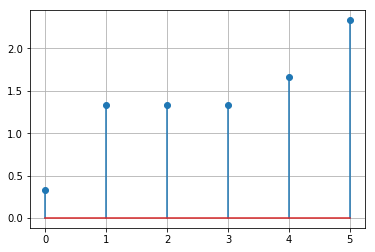

In [2]:
import matplotlib.pyplot as plt

f = [0,1,2,3,4,5]
y = [1/3,4/3,4/3,4/3,5/3,7/3]
plt.stem(f,y)

plt.grid()
plt.show()

# Question 4

Let the input be

$f = [ 2, 3, 1, 4 ]$

and I go tell you to find (via a matched filter)

$g = [ 3, 1 ]$

In Python, we can calculate convolution via

a1 = np.convolve([2, 3, 1, 4], [3, 1], 'full')

and correlation via

a2 = np.correlate([2, 3, 1, 4], [3, 1], 'full')

Question: W.r.t. the matched filter, the desired output is what we see above for np.correlate. However, if we have a device that does digital signal processing and it runs convolution vs. correlation (yes folks, designing chips around convolution is better due to "little math properties" like associative, commutative, and distributive), how can we get convolution to do correlation (and therefore our matched filter)?

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f = [2,3,1,4]
g = [3,1]

mFilter = np.conjugate(g) #Flip the filter
a1 = np.convolve(f,mFilter, 'full') #perform convolution with flipped filter

print(a1);

[ 6 11  6 13  4]


# Question 5

A long time ago you learned about vector projection, i.e., projection of vector $a$ onto $b$

$\text{proj}_{b}{a} = \left( \frac{ a \cdotp b }{ |b| } \right) \left( \frac{b}{|b|} \right)$

where dot (i.e., $\cdotp$) is the dot product and $|b|$ is the magnitude of vector $b$, i.e.,

$a \cdotp b = \sum_{i=1}^{N}{ a_i b_i }$

and

$|b| = \sqrt{\sum_{i=1}^{N}{ b_i b_i }}$

Recall, $\left( f \circledast g \right)[n]$ at each "step" ($n$) is nothing more than a dot/inner product. Below, I geometrically show what convolution is doing at each step. 

Pay attention to the result of convolution for sub-signals (i) $[1.6, 0.5]$, (ii) $[3.2, 1]$, and (iii) $[6.4, 2]$. (i) is 1/2 of the filters value, (ii) is exactly our filter, and (iii) is 2 times the filters value. Imagine these signals are the values of two different pixels in an image. As such, (i) might be our signal in shadow, (ii) is our recorded signal, and (iii) is our signal with "more energy" (e.g., illumination). What might we conclude about the behavor of convolution with respect to (i) shadows, (ii) that perfect scenario, and (iii) areas of increased energy/illumination?

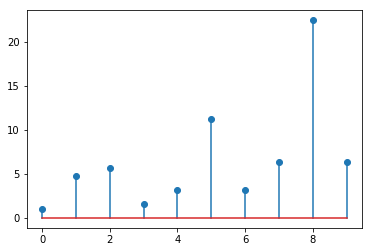

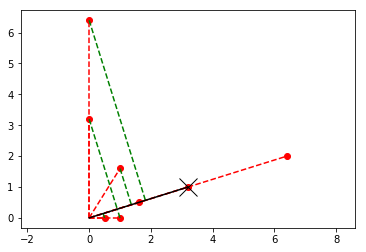

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# assume an input signal of
f = [ 1, 1.6, 0.5, 0, 3.2, 1, 0, 6.4, 2 ]

# assume a filter of
g = [ 3.2, 1 ]

# what's the conv result? (lets plot it!)
convres = np.convolve(f,[g[1], g[0]],'full')
plt.figure(1)
plt.stem(convres)
plt.show()

# draw each step of convolution (kernel is 2D so we are in a two dimensional space)
plt.figure(2)
for i in range(0,len(f)-1,1):
    plt.plot([0, f[i]],[0, f[i+1]],'--r'); plt.plot(f[i],f[i+1],'ro');

# project our sub-f signals onto our filter g (since we know convolution is doing dot product)
g_norm = g / np.linalg.norm(g)
for i in range(0,len(f)-1,1):
    sf = [f[i], f[i+1]]
    proj = ( np.dot(sf,g) / np.linalg.norm(g) ) * g_norm 
    plt.plot([sf[0], proj[0]],[sf[1], proj[1]],'--g'); 

# last, plot our filter
plt.plot([0,g[0]],[0, g[1]],'k'); plt.plot(g[0],g[1],'kx',markersize=18);

plt.axis('equal')
plt.show()

In all three instances convolution identifies that the signal matches the filter because there are spikes in each of the three places where the three cases are on the graph. For situation (i) the convolution will find a match, but it will have the lowest intensity. For situation (ii) the convolution will find a match, but it will have medium intensity. For situation (iii) convolution will find a match and it will have the highest intensity. This seems undesirable because intuitively it seems that the exact signal you are searching for should have the highest resultant value from convolution. 

# Question 6

W.r.t. the matched filter, what does the following do?

1) (zero mean) 

$s = x - \left( m = \frac{\sum_{i=1}^{N}{x_i}}{N} \right)$

where $s$ is the new zero mean signal, $x$ is our input signal, $N$ is the length of our signal, and $x_i$ are the samples in $x$.

2) (unit normalization) 

$\hat{s} = \frac{s}{ \sqrt{ \frac{ \sum_{i=1}^N{(x_i - m)}^2 }{N-1} } }$

where $\hat{s}$ is the new normalized signal

1)	Zero-mean normalization slides the filter vertically so that the average of the filter is zero. On a matrix, zero-mean normalization creates a matrix where the values in the matrix have a mean of 0.

2)	In unit normalization each element of the filter is multiplied so the length of its associated vector is 1. This normalizes the filter to unit energy. The length of each vector is the square root of the sum of squares of all values which is represented by the equation
